<h1> Cleaning the data</h1>
We will : 
<br>    1 - Import the data
<br>    2 - Filter out unrelated rows
<br>    3 - Filter out unrelated columns
<br>    4 - Treat anomalies
<br>    5 - Export the clean data

<h2> 1 - Importing the data </h2>

<h3> 1.a - Import modules</3>

In [1]:
import pandas as pd
# Import `pyplot` and `numpy`
import matplotlib.pyplot  as plt
import matplotlib.pylab as plb
import numpy as np
import seaborn as sns
import datetime
import numexpr
import bottleneck
import feather


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 500
pd.options.display.max_columns = 200 
pd.set_option('display.float_format', lambda x: '%.6f' % x) #display numbers as decimals instead of scientific value

foodfacts_filepath = 'fr.openfoodfacts.org.products.csv'

<h3> 1.b - Import CSV</3>

In [2]:
#Import csv in a DataFrame (10 seconds)
df = pd.read_csv("fr.openfoodfacts.org.products.csv"
                       , header = 'infer'
                       , sep ="\t"
                        , low_memory=False)
print ('CSV Imported. Shape :')
df_save = df.copy() #keep a copy of original data
df.shape #(320772, 162)

CSV Imported. Shape :


(320772, 162)

In [3]:
df = df_save.copy()

<h3> 1.c - Rename columns</3>

In [4]:
df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
df_stats = df.describe(include='all')
df_stats

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,0.000000,248939.000000,248905,154680,154680,248939.000000,0.000000,4835,248939.000000,0.000000,11696,0.000000,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836,261113.000000,857.000000,243891.000000,229554.000000,0.000000,0.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,24.000000,23.000000,0.000000,0.000000,1.000000,0.000000,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.000000,14.000000,0.000000,0.000000,0.000000,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5300.000000,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.00

<h2> 2 - Filter out unrelated rows </h2>

<h3> 2.a - Drop rows without enough data</3>

Dropping rows with no product name

In [5]:
#Removing rows with no product_name (filled at 95%)
#Around 18K products
list_to_drop = df[df['product_name'].isna()]
list_to_drop.sample()
print(list_to_drop.count().max() , 'products dropped')
df.drop(list_to_drop.index, inplace=True)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
302218,8002270716522,http://world-fr.openfoodfacts.org/produit/8002...,kyzh,1438259301,2015-07-30T12:28:21Z,1438259343,2015-07-30T12:29:03Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:GB,en:united-kingdom,Royaume-Uni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/80...,http://fr.openfoodfacts.org/images/products/80...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


17762 products dropped


Not enough composition columns filled

In [6]:
list_to_drop = df[pd.isnull(df[['sugars_100g', 'fat_100g', 'energy_100g', 'proteins_100g', 'salt_100g']]).all(axis=1)]
list_to_drop.sample()
print(list_to_drop.count().max() , 'products dropped')
df.drop(list_to_drop.index, inplace=True)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
111037,0099999146448,http://world-fr.openfoodfacts.org/produit/0099...,stephane,1441368188,2015-09-04T12:03:08Z,1441388014,2015-09-04T17:33:34Z,Creamy Icing for Raisin Bread,NaN,NaN,NaN,NaN,Hershey Farm,hershey-farm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pennsylvania,NaN,United States,en:united-states,États-Unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,nan,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


43809 products dropped


<h3> 2.b - Drop rows which are not food </3>

Dropping some non-food products

In [7]:
list_to_drop = df[df['categories_tags'].fillna('').str.contains('en:non-food-products')]
list_to_drop[['product_name', 'categories', 'categories_tags']].sample()
print(list_to_drop.count().max(), 'products dropped')
df.drop(list_to_drop.index,  inplace=True)

,product_name,categories,categories_tags
222741,"Lingettes pocket pour visage et mains, biodégr...",Open Beauty Facts,"en:non-food-products,en:open-beauty-facts"


5 products dropped


Dropping categories :  bodybuilding-supplements, dietary-supplements, baby-foods

In [8]:
list_to_drop = df[df['categories_tags'].fillna('').str.contains('en:dietary-supplements|en:bodybuilding-supplements|en:baby-foods')]
list_to_drop.sample()
print(list_to_drop.count().max(), 'products dropped')
df.drop(list_to_drop.index,  inplace=True)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
292010,7613034129543,http://world-fr.openfoodfacts.org/produit/7613...,loverock,1477668027,2016-10-28T15:20:27Z,1481898091,2016-12-16T14:21:31Z,NaturNes Carottes Lentilles Touche de Thym,Aliment pour bébés,400g (2x200g),"carton,pots,plastique","carton,pots,plastique",Nestlé,nestle,"Aliments pour bébé,Dès 6 mois,Plats principaux...","en:baby-foods,en:from-6-months,en:main-meals-f...","Aliments pour bébé,Dès 6 mois,Plats principaux...",NaN,NaN,NaN,NaN,"Peu ou pas de sel,100% naturel,Sans sel ajouté...","en:low-or-no-salt,en:no-colorings,en:no-preser...","Peu ou pas de sel,Sans colorants,Sans conserva...",NaN,NaN,NaN,NaN,NaN,"chalon-sur-saône,france,courrières",Noz,France,en:france,France,"Légumes 52% (carottes 25%, lentilles cuites 21...",NaN,NaN,Gluten,en:gluten,Gluten,200g,nan,1.000000,[ legumes-52 -> fr:legumes-52 ] [ legumes -...,en:e300,E300 - Acide ascorbique,0.000000,nan,NaN,1.000000,nan,huile-vegetale,nan,a,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:baby-foods,Aliments pour bébé,NaN,NaN,185.000000,nan,0.800000,0.100000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6.200000,1.700000,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,2.000000,nan,nan,nan,

793 products dropped


<h2> 3 - Filter out unrelated columns </h2>

<h3> 3.a - Drop columns always empty </h3>

In [9]:
print(df_stats.T[df_stats.T['count'] ==0].count().max(), 'empty columns deleted')
df = df.drop(df_stats.T[df_stats.T['count'] ==0].index, axis=1)
print(df.shape[1] ,'columns left')

16 empty columns deleted
146 columns left


<h3> 3.b - Keep usefull columns & fill null values </h3>

We'll keep specific text columns but all numeric ones

In [10]:
print(df.shape[1] ,'columns before')
keep_text_columns =['code',  'product_name', 'brands', 'categories', 'last_modified_datetime',
       'categories_tags',
       'labels_fr', 'countries_fr',
       'ingredients_text', 'allergens', 'additives_n', 'additives_tags',
       'additives_fr', 'nutrition_grade_fr','main_category',
       'main_category_fr']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
keep_number_columns = df.select_dtypes(include=numerics).columns.tolist()
keep_columns = keep_number_columns+keep_text_columns
keep_columns = list(dict.fromkeys(keep_columns))
df_keep = df[keep_columns].copy()

146 columns before


Drop other columns

In [11]:
df = df_keep.copy()
print(df.shape[1] ,'columns left')


105 columns left


Fill null / NaN values

In [12]:
keep_number_columns.remove('nutrition_score_fr_100g')
keep_number_columns.remove('nutrition_score_uk_100g')

keep_text_columns.remove('last_modified_datetime')
keep_text_columns.remove('nutrition_grade_fr')
df[keep_number_columns]= df[keep_number_columns].fillna(0)
df[keep_text_columns]= df[keep_text_columns].fillna('')
print('Null values filled')


Null values filled


<h2> 4 - Treat anomalies </h2>

<h3> 4.a - Drop products which have negative percent columns or above 100

Selecting all rows that are supposed to be percents

In [13]:
percent_columns = df.filter(like = '100g').drop([
'carbon_footprint_100g'
,'energy_100g'
,'energy_from_fat_100g'  
,'nutrition_score_fr_100g'
,'nutrition_score_uk_100g'
]
,axis = 1
).columns

In [14]:
negative_rows = df[df[percent_columns].lt(0).any(axis=1)]
negative_rows.sample()
print('Dropping',negative_rows.count().max(),'values < 0')
df = df.drop(negative_rows.index, axis = 0)

above100_rows = df[df[percent_columns].gt(100).any(axis=1)]
above100_rows.sample()
print('Dropping',above100_rows.count().max(),'values > 100')
df = df.drop(above100_rows.index, axis = 0)

print('Given the low number of anomalies, I chose to discard the items instead of fixing the values')

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,montanic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,gondoic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,code,product_name,brands,categories,last_modified_datetime,categories_tags,labels_fr,countries_fr,ingredients_text,allergens,additives_tags,additives_fr,nutrition_grade_fr,main_category,main_category_fr
80440,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000340,0.000000,0.000000,0.000000,0.000000,1.132100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,0072392312726,"Flavor Aid, Soft Drink Mix, Lemon",The Jel Sert Co.,,2017-03-09T10:01:05Z,,,États-Unis,"Citric and/or fumaric acid, dextrose, lemon ju...",,"en:e297,en:e341iii,en:e300,en:e102","E297 - Acide fumarique,E341iii - Phosphate de ...",NaN,,


Dropping 28 values < 0


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,montanic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,gondoic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,code,product_name,brands,categories,last_modified_datetime,categories_tags,labels_fr,countries_fr,ingredients_text,allergens,additives_tags,additives_fr,nutrition_grade_fr,main_category,main_category_fr
18848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.680000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,0021248102585,Himalayan Pink Salt,Olde Thompson,,2017-03-09T12:08:34Z,,,États-Unis,Himalayan pink salt,,,,NaN,,


Dropping 215 values > 100
Given the low number of anomalies, I chose to discard the items instead of fixing the values


<h3> 4.b - Drop some products with unreal components

In [15]:
list_to_drop = df[(df['trans_fat_100g']>=28) & (df['fat_100g']<28)]
print('These organic raisins contain0% fats but 40% trans fats?')
list_to_drop[list_to_drop['code']=='0032601050108']
print(list_to_drop.count().max() , 'products dropped')
df.drop(list_to_drop.index, inplace=True)

These organic raisins contain0% fats but 40% trans fats?


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,montanic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,gondoic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,code,product_name,brands,categories,last_modified_datetime,categories_tags,labels_fr,countries_fr,ingredients_text,allergens,additives_tags,additives_fr,nutrition_grade_fr,main_category,main_category_fr
28172,0.000000,0.000000,0.000000,1255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,80.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.002700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,0032601050108,Raisins,Earthbound Farm Organic,,2017-03-09T14:08:39Z,,,États-Unis,"Organic raisins, less than 1% organic sunflowe...",,,,c,,


25 products dropped


<h3> 4.c - Drop duplicated products

In [16]:
df_no_duplicates = df.drop_duplicates(['product_name', 'brands'])

print('Dropping',df.shape[0]-df_no_duplicates.shape[0],'duplicates.')

df = df_no_duplicates
df = df.dropna(how='all')

Dropping 18234 duplicates.


In [17]:
df.shape
df.describe(include='all')

(239901, 105)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,montanic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,gondoic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,code,product_name,brands,categories,last_modified_datetime,categories_tags,labels_fr,countries_fr,ingredients_text,allergens,additives_tags,additives_fr,nutrition_grade_fr,main_category,main_category_fr
count,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,239901.000000,202920.000000,202920.000000,239901,239901,239901,239901,239901,239901,239901,239901,239901,239901,239901,239901,202920,239901,239901
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,239901,186415,46089,27611,118995,16002,11065,505,182278,11612,38339,38339,5,2305,2305
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0602652170508,Extra Virgin Olive Oil,,,2015-08-09T17:35:48Z,,,États-Uni

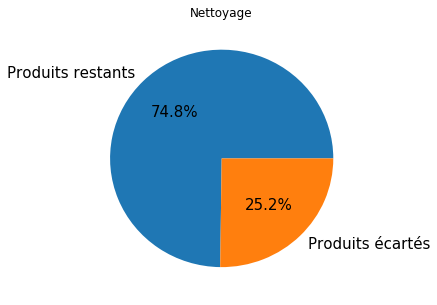

In [18]:
df_plt_results = pd.DataFrame({'Products count': [df.shape[0], df_save.shape[0]-df.shape[0]]},
                  index=['Produits restants', 'Produits écartés'])
plot = df_plt_results.plot.pie(y='Products count'
                               , figsize=(5, 5)
                               , autopct='%1.1f%%'
                                , title = 'Nettoyage'
                               , fontsize=15 
                               , legend = False)
plot = plt.ylabel('')


<h2> 5 - Export the clean data </h2>

Export using Feather module

In [19]:
feather.write_dataframe(df, 'openfoodfacts_cleaned_v1.feather')